# Machine Learning Model on Predicting Credit Risk

## Domain - BANKING

### Group Members :- Manvita, Ann, Deepak and Jenson

### Objective: A data science approach to predict and understand the applicant’s profile to minimize the risk of loan defaults.

#### Credit Risk: It is the risk that a lender takes the chance that a borrower fails to make required payments of the loan.

### About the project:

The dataset contains information about credit applicants. Banks use this kind of dataset and type of informative data to create models to help in deciding on who to accept/refuse for a loan based on Credit Risk.  

### Machine Learning issue and objectives:

We’re dealing with a supervised binary classification problem. The goal is to train the best machine learning model to maximize the predictive capability of deeply understanding the past customer’s profile minimizing the risk of future loan defaults.

### Performance Metric:

The metric used for the models’ evaluation is the ROC AUC given that we’re dealing with a highly unbalanced data.

### Project structure:
#### The project is divided into five categories:


    1. Data collection
    2. Pre-processing
    3. Exploratory data Analysis
    4. Modelling
    5. Model fine tuning

## 1. Data Collection

### The dataset used in this project is: 'credit_risk_data.csv'

It is one of the open source dataset available in the web for Machine Learning and Datascience.

The Dataset contains the below features:
* person_age ->    Age of the borrower
* person_gender ->   Gender of the person (0 is 'Male' & 1 is 'Female')
* person_income ->  Annual Income of the person
* personhomeownership -> Home ownership
* personemplength -> Employment length or experience (in years)
* loan_intent -> Loan intent or type of loan
* loan_grade -> Loan grade
* loan_amnt -> Loan amount
* loan_int_rate -> Interest rate
* loan_status -> Loan status (0 is non-default & 1 is default)
* loan_percent_income -> Percent income (loan as percentage of income)
* cb_person_default_on_file -> Historical default (yes/no)
* cb_person_cred_hist_length -> Credit history length (in years)

### Problem Statement :- 
#### To predict the target  'Loan_Status', to find out whether the person will be able to repay the loan amount or not.

In [1]:
# Importing the libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading and displaying the dataset:
data = pd.read_csv('credit_risk_data.csv')
data.head()

,person_age,person_gender,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,0,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,0,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,0,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,0,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,1,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Shape of dataset:
data.shape

(32581, 13)

#### The dataset has 32581 observations and 13 variables including the target, divided into 9 numerical and 4 categorical features.

In [5]:
# Info and datatypes of dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_gender               32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  cb_person_default_on_file   32581 non-null  object 
 12  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
#There are variables with missing values: ‘person_emp_length’ and ‘loan_int_rate'.

In [7]:
# Main stats of variables:
data.describe()

,person_age,person_gender,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,0.501734,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,0.500005,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,0.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,0.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,1.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,1.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,1.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


From the difference between the mean and the median, and also the distance of maximum values of the variables it seems there are some outliers.

## 2. Data Preprocessing steps:

### (i) Handling Missing Values

In [8]:
#Checking for missing values:

nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})

nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)

nulval

,absolute,percent
person_age,0,0.00
person_gender,0,0.00
person_income,0,0.00
person_home_ownership,0,0.00
person_emp_length,895,22.31
loan_intent,0,0.00
loan_grade,0,0.00
loan_amnt,0,0.00
loan_int_rate,3116,77.69
loan_status,0,0.00


In [9]:
# Measures of central tendency of feature 'person_emp_length'
print('Mean of person_emp_length:',data['person_emp_length'].mean())
print('Median of person_emp_length:',data['person_emp_length'].median())
print('Mode of person_emp_length:',data['person_emp_length'].mode())

Mean of person_emp_length: 4.789686296787225
Median of person_emp_length: 4.0
Mode of person_emp_length: 0    0.0
dtype: float64


In [10]:
# Measures of central tendency of feature 'loan_int_rate'
print('Mean of loan_int_rate:',data['loan_int_rate'].mean())
print('Median of loan_int_rate:',data['loan_int_rate'].median())
print('Mode of loan_int_rate:',data['loan_int_rate'].mode())

Mean of loan_int_rate: 11.01169489224439
Median of loan_int_rate: 10.99
Mode of loan_int_rate: 0    7.51
dtype: float64


#### Observation:

* person_emp_length is the person employment history, the null values can be replaced with median, which is 4 years.
* loan_int_rate is the loan income rate, the null values can be replaced with 10.99, which is the median.

In [11]:
# Mode imputation for missing values
data['person_emp_length'].fillna(data['person_emp_length'].median(),inplace=True)
print(f"Imputation person_emp_length done. Missing values: {data.person_emp_length.isnull().sum()}")
data['loan_int_rate'].fillna(data['loan_int_rate'].median(),inplace=True)
print(f"Imputation loan_int_rate done. Missing values: {data.loan_int_rate.isnull().sum()}")
data.isna().sum()

Imputation person_emp_length done. Missing values: 0
Imputation loan_int_rate done. Missing values: 0


person_age                    0
person_gender                 0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### (ii) Outlier Detection and Handling

Text(0.5, 1.0, 'Box plot of person_age')

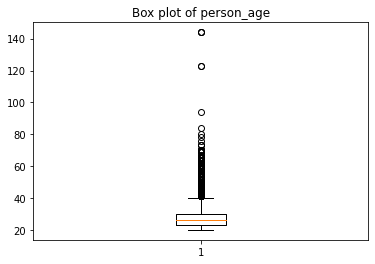

In [12]:
#person_age
plt.boxplot(data['person_age'])
plt.title('Box plot of person_age')

In [13]:
Q1 = np.percentile(data['person_age'],25,interpolation='midpoint')
Q2 = np.percentile(data['person_age'],50,interpolation='midpoint')
Q3 = np.percentile(data['person_age'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('IQR is : ', IQR)
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)

IQR is :  7.0
Lower limit is :  12.5
Upper limit is :  40.5


In [14]:
outlier=[]
for x in data['person_age']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)
len(outlier)

1494

Text(0.5, 1.0, ' Box plot of person_age ')

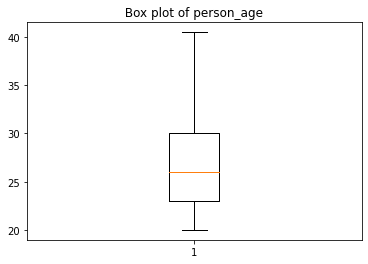

In [15]:
# Replacing outlier values with upper limit and lower limit 
data['person_age']=np.where(data['person_age']>upper_limit,upper_limit,np.where(data['person_age']<low_limit,low_limit,data['person_age']))

plt.boxplot(data['person_age'])
plt.title(' Box plot of person_age ')

Text(0.5, 1.0, 'Box plot of person_income')

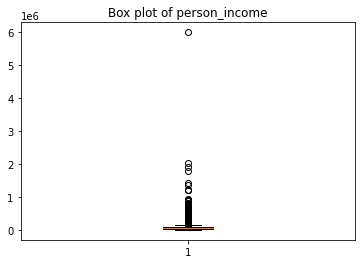

In [16]:
plt.boxplot(data['person_income'])
plt.title('Box plot of person_income')

In [17]:
Q1 = np.percentile(data['person_income'],25,interpolation='midpoint')
Q2 = np.percentile(data['person_income'],50,interpolation='midpoint')
Q3 = np.percentile(data['person_income'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('IQR is : ', IQR)
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)

IQR is :  40700.0
Lower limit is :  -22550.0
Upper limit is :  140250.0


In [18]:
outlier=[]
for x in data['person_income']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)
len(outlier)

1484

Text(0.5, 1.0, ' Box plot of person_income ')

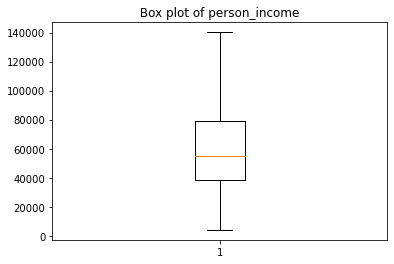

In [19]:
# Replacing outlier values with upper limit and lower limit 
data['person_income']=np.where(data['person_income']>upper_limit,upper_limit,np.where(data['person_income']<low_limit,low_limit,data['person_income']))

plt.boxplot(data['person_income'])
plt.title(' Box plot of person_income ')

Text(0.5, 1.0, ' Box plot of person_emp_length ')

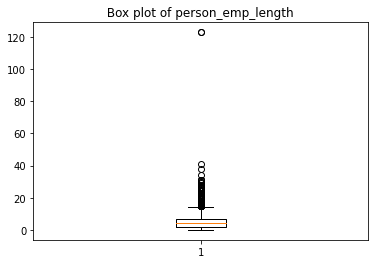

In [20]:
plt.boxplot(data['person_emp_length'])
plt.title(' Box plot of person_emp_length ')

In [21]:
Q1 = np.percentile(data['person_emp_length'],25,interpolation='midpoint')
Q2 = np.percentile(data['person_emp_length'],50,interpolation='midpoint')
Q3 = np.percentile(data['person_emp_length'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('IQR is : ', IQR)
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)

outlier=[]
for x in data['person_emp_length']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)
len(outlier)

IQR is :  5.0
Lower limit is :  -5.5
Upper limit is :  14.5


853

Text(0.5, 1.0, ' Box plot of person_emp_length ')

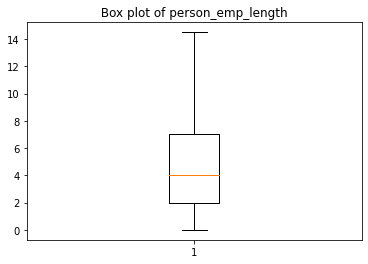

In [22]:
# Replacing outlier values with upper limit and lower limit 
data['person_emp_length']=np.where(data['person_emp_length']>upper_limit,upper_limit,np.where(data['person_emp_length']<low_limit,low_limit,data['person_emp_length']))

plt.boxplot(data['person_emp_length'])
plt.title(' Box plot of person_emp_length ')

Text(0.5, 1.0, 'Box plot of cb_person_cred_hist_length')

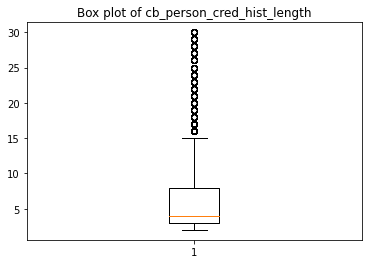

In [23]:
plt.boxplot(data['cb_person_cred_hist_length'])
plt.title('Box plot of cb_person_cred_hist_length')

In [24]:
Q1 = np.percentile(data['cb_person_cred_hist_length'],25,interpolation='midpoint')
Q2 = np.percentile(data['cb_person_cred_hist_length'],50,interpolation='midpoint')
Q3 = np.percentile(data['cb_person_cred_hist_length'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('IQR is : ', IQR)
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)
outlier=[]
for x in data['cb_person_cred_hist_length']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)
len(outlier)

IQR is :  5.0
Lower limit is :  -4.5
Upper limit is :  15.5


1142

Text(0.5, 1.0, ' Box plot of cb_person_cred_hist_length ')

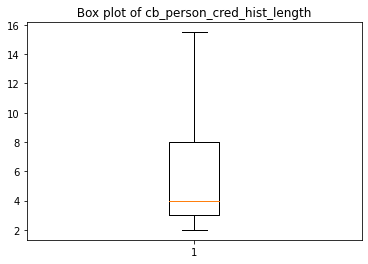

In [25]:
# Replacing outlier values with upper limit and lower limit 
data['cb_person_cred_hist_length']=np.where(data['cb_person_cred_hist_length']>upper_limit,upper_limit,np.where(data['cb_person_cred_hist_length']<low_limit,low_limit,data['cb_person_cred_hist_length']))

plt.boxplot(data['cb_person_cred_hist_length'])
plt.title(' Box plot of cb_person_cred_hist_length ')

### (iii) Encoding

In [26]:
# Type of variables
data.dtypes.sort_values(ascending=True)

person_gender                   int64
loan_amnt                       int64
loan_status                     int64
person_age                    float64
person_income                 float64
person_emp_length             float64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_cred_hist_length    float64
person_home_ownership          object
loan_intent                    object
loan_grade                     object
cb_person_default_on_file      object
dtype: object

#### Here we need to convert the object data types to encoded format to make the machine understand

In [27]:
# Counting variables by type:
data.dtypes.value_counts()

float64    6
object     4
int64      3
dtype: int64

In [28]:
data['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [29]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a = ['person_home_ownership']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform( data[a[i]])
data.head()

,person_age,person_gender,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,0,59000.0,3,14.5,PERSONAL,D,35000,16.02,1,0.59,Y,3.0
1,21.0,0,9600.0,2,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2.0
2,25.0,0,9600.0,0,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3.0
3,23.0,0,65500.0,3,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2.0
4,24.0,1,54400.0,3,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4.0


In [30]:
data['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [31]:
b = ['loan_intent']
for i in np.arange(len(b)):
    data[b[i]]=label_en.fit_transform( data[b[i]])
data.head()

,person_age,person_gender,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,0,59000.0,3,14.5,4,D,35000,16.02,1,0.59,Y,3.0
1,21.0,0,9600.0,2,5.0,1,B,1000,11.14,0,0.10,N,2.0
2,25.0,0,9600.0,0,1.0,3,C,5500,12.87,1,0.57,N,3.0
3,23.0,0,65500.0,3,4.0,3,C,35000,15.23,1,0.53,N,2.0
4,24.0,1,54400.0,3,8.0,3,C,35000,14.27,1,0.55,Y,4.0


In [32]:
data['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [33]:
c = ['loan_grade']
for i in np.arange(len(c)):
    data[c[i]]=label_en.fit_transform( data[c[i]])
data.head()

,person_age,person_gender,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,0,59000.0,3,14.5,4,3,35000,16.02,1,0.59,Y,3.0
1,21.0,0,9600.0,2,5.0,1,1,1000,11.14,0,0.10,N,2.0
2,25.0,0,9600.0,0,1.0,3,2,5500,12.87,1,0.57,N,3.0
3,23.0,0,65500.0,3,4.0,3,2,35000,15.23,1,0.53,N,2.0
4,24.0,1,54400.0,3,8.0,3,2,35000,14.27,1,0.55,Y,4.0


In [34]:
data['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [35]:
d = ['cb_person_default_on_file']
for i in np.arange(len(d)):
    data[d[i]]=label_en.fit_transform( data[d[i]])
data.head()

,person_age,person_gender,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,0,59000.0,3,14.5,4,3,35000,16.02,1,0.59,1,3.0
1,21.0,0,9600.0,2,5.0,1,1,1000,11.14,0,0.10,0,2.0
2,25.0,0,9600.0,0,1.0,3,2,5500,12.87,1,0.57,0,3.0
3,23.0,0,65500.0,3,4.0,3,2,35000,15.23,1,0.53,0,2.0
4,24.0,1,54400.0,3,8.0,3,2,35000,14.27,1,0.55,1,4.0


### (iv) Feature Reduction

<AxesSubplot:>

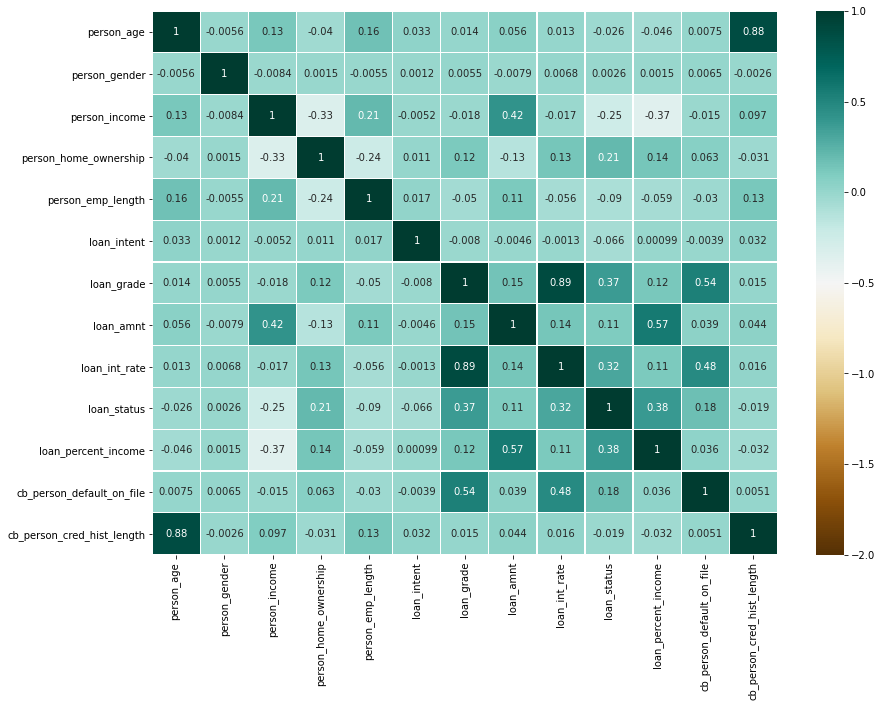

In [36]:
correlation_matrix = data.corr()
plt.subplots(figsize=(14,10))
sns.heatmap(correlation_matrix,fmt='.2g',vmin=-2,vmax=1,annot=True,linewidths=0.2,cmap='BrBG')

#### Observation:

Person_Age and Person_Gender are having very less correlation with target column 'Loan_Status' , hence we are dropping these features.

In [37]:
x = data.drop(['person_age','person_gender','loan_status'],axis=1)
y = data['loan_status']

### (v) Standardization/Normalization
        
        Variables that are measured at different scales do not contribute equally to the model fitting and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization (μ=0, σ=1) is usually used prior to model fitting.
        
        StandardScaler function of Sklearn is used for Scaling.
        
        StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.
        
        Here, we use Feature scaling in the upcoming Model fitting section.

### 3. Exploratory Data Analysis

        The preliminary analysis of data to discover relationships between measures in the data and to gain an insight on the trends, patterns, and relationships among various entities present in the data set with the help of statistics and visualization tools is called Exploratory Data Analysis (EDA). 

In [38]:
# importing necessary libraries
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr

### (i) Univariate Analysis

        In univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it and analyze the pattern present in it.
        Some patterns that can be easily identified with univariate analysis are Central Tendency (mean, mode and median), Dispersion (range, variance), Quartiles (interquartile range), and Standard deviation.
        Univariate data can be described through:
            Frequency Distribution Tables
            Bar Charts
            Histograms
            Pie Charts
            Frequency Polygons

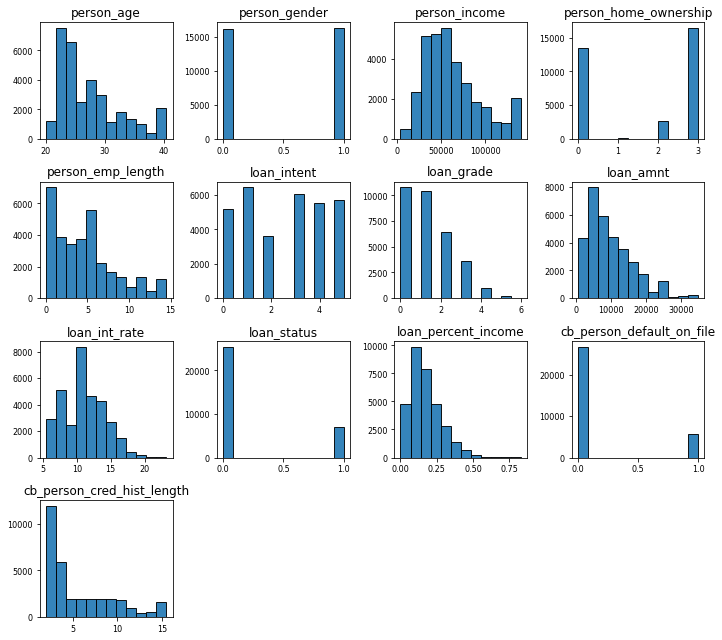

In [39]:
# Visualization of the numeric distribution:
data.hist(figsize=(10,9), bins=12, ec='black', xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

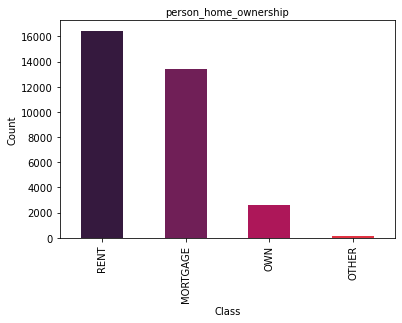

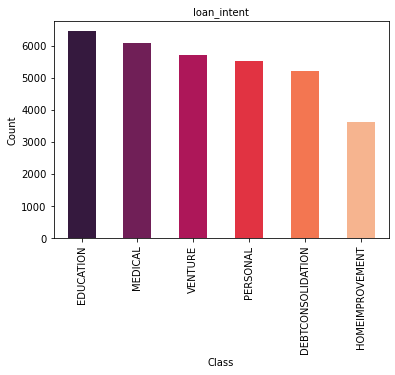

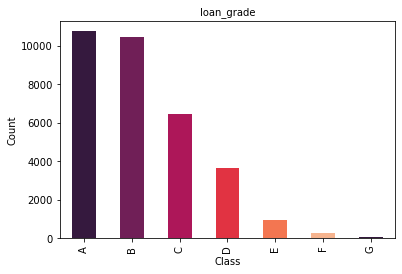

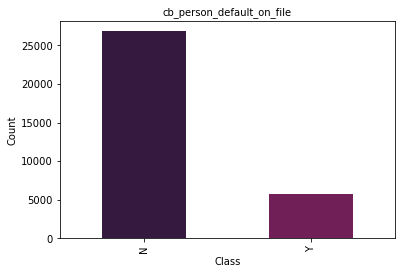

In [40]:
# Visualization of the categoric distribution:
# Since we have encoded these features, we are reading the data set again to do the visualization
df = pd.read_csv('credit_risk_data.csv')
for col in df.select_dtypes(include=["object"]).columns:
    df[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="center")
    plt.show();

### (ii) Bivariate Analysis:
        
    The analysis is related to cause and the relationship between the two variables. 
    
        Bivariate data can be described through:
            Scatter Plot
            Linear Correlation
            Chi-square Test
            Z-test and t-test
            ANOVA

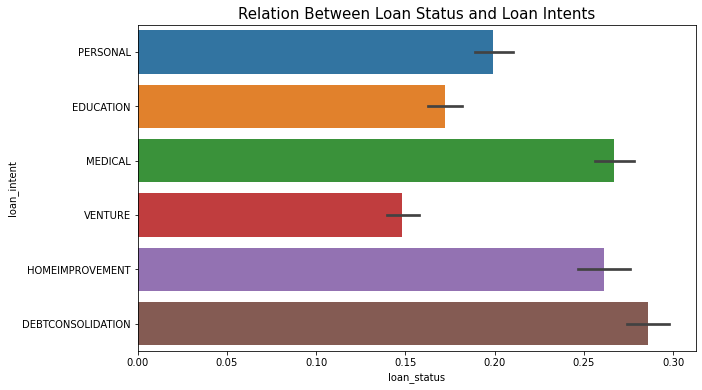

In [41]:
#barplots
plt.figure(figsize=(10,6))
sns.barplot(x=df["loan_status"], y=df["loan_intent"])
plt.title("Relation Between Loan Status and Loan Intents", size=15)
plt.show()

#### Insight :- 
    Most of the loan is taken for 'Debt Consolidation' and the least for 'Venture'.

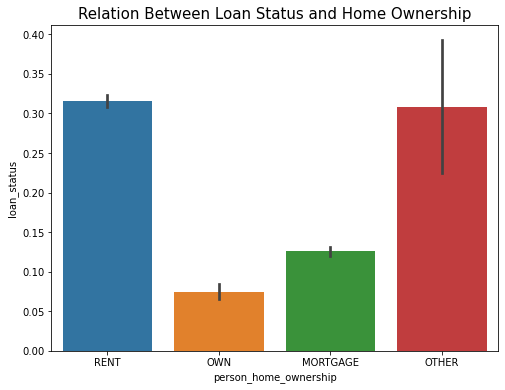

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(x=df["person_home_ownership"], y=df["loan_status"])
plt.title("Relation Between Loan Status and Home Ownership", size=15)
plt.show()

#### Insight :-  
        Most of the loan were taken by people who are renting a house and the least by people who own a house.

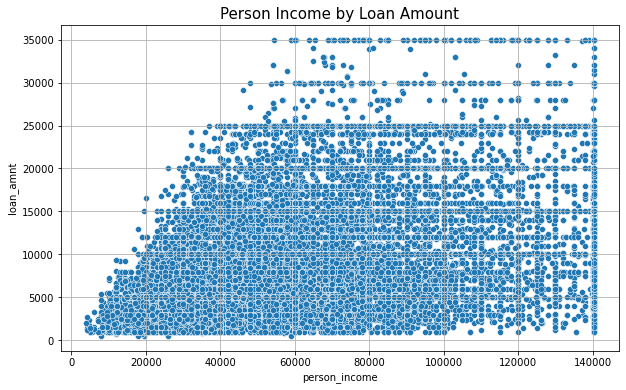

In [43]:
# Scatterplot
# Here we are considering the pre processed dataset since we have handled outliers in the column 'person_income'
plt.figure(figsize=(10,6))
sns.scatterplot(x="person_income", y="loan_amnt", data=data)
plt.title("Person Income by Loan Amount", size=15)
plt.grid()

#### Insight :-
    Here we can say that people who have the income ranging from 1000 to 1,00,000 have taken most of the loans.

In [44]:
# Correlation Heatmap

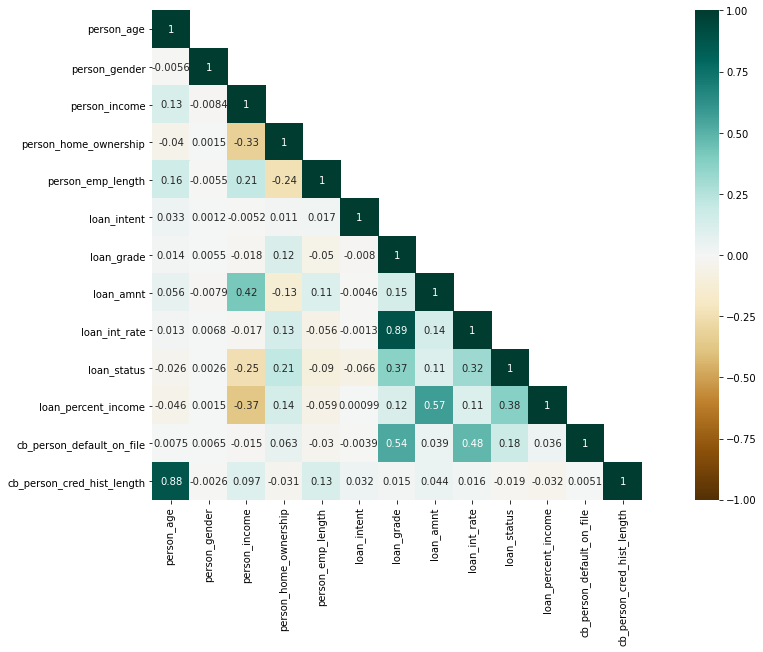

In [45]:
mask = np.triu(data.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [46]:
#At this point, we are ready to test and train some models!

### 4. Modelling

In [47]:
# MACHINE LEARNING: Predictive modeling

# We’re dealing with a supervised binary problem using classification techniques.

# Given that we have unbalanced data, we’ll use AUC ROC as the best metric to evaluate the performance of the prediction models.

In [48]:
# importing necessary libraries
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score,auc, roc_curve, plot_confusion_matrix

In [49]:
# Let’s define a function of the AUC to plot and display the threshold between the true positive rate (TPR) and false positive rate (FPR).
# ROC Curve: Area Under the Curve
def auc_roc_plot(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [50]:
# Dividing the dataset in train (80%) and test (20%)
x = data.drop(['person_age','person_gender','loan_status'],axis=1)
y = data['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.20)

In [51]:
# Model 1 --> RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print('Accuracy on Random Forest model is : ',accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy on Random Forest model is :  0.9277274819702317
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5036
           1       0.97      0.70      0.82      1481

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.92      6517



0.8488505314068217


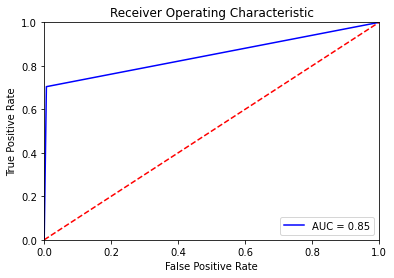

In [52]:
auc_roc_plot(y_test, y_pred)

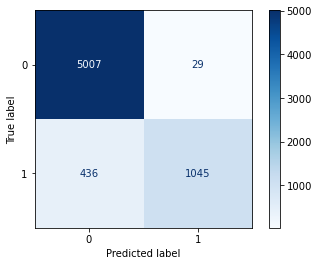

In [53]:
# Confusion Matrix display
plot_confusion_matrix(rf.fit(x_train,y_train), x_test, y_test, values_format=".4g", cmap="Blues");

In [54]:
# MODEL 2 --> GradientBoostingClassifier 
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)

print('Accuracy on Gradient Boosting model is ',accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy on Gradient Boosting model is  0.9176001227558692
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5036
           1       0.94      0.68      0.79      1481

    accuracy                           0.92      6517
   macro avg       0.93      0.83      0.87      6517
weighted avg       0.92      0.92      0.91      6517



0.8341946761172361


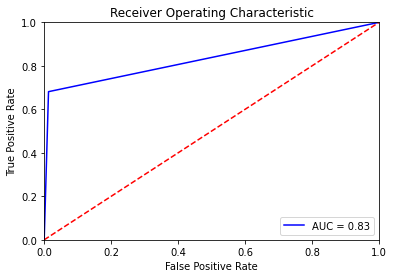

In [55]:
auc_roc_plot(y_test, y_pred)

In [56]:
# MODEL 3 --> XGBClassifier 
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

y_pred=xgb.predict(x_test)
print('Accuracy on Extreme Gradient Boosting model is ',accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[19:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on Extreme Gradient Boosting model is  0.9289550406628817
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5036
           1       0.94      0.73      0.82      1481

    accuracy                           0.93      6517
   macro avg       0.93      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517



0.8603694185121681


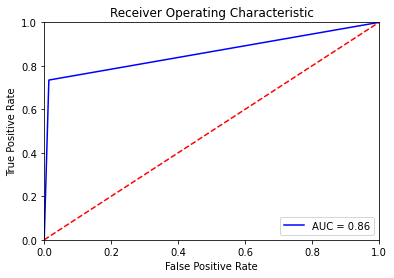

In [57]:
auc_roc_plot(y_test, y_pred)

In [58]:
# MODEL 4 --> DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

y_pred = dt_model.predict(x_test)

print ("Accuracy on Decision Tree model is ",metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy on Decision Tree model is  0.8821543655056008
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5036
           1       0.73      0.76      0.75      1481

    accuracy                           0.88      6517
   macro avg       0.83      0.84      0.83      6517
weighted avg       0.88      0.88      0.88      6517



0.838428808862483


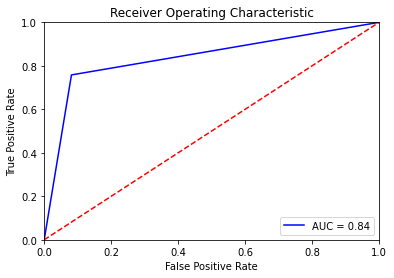

In [59]:
auc_roc_plot(y_test, y_pred)

In [60]:
# MODEL 5 --> LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5036
           1       0.75      0.19      0.30      1481

    accuracy                           0.80      6517
   macro avg       0.78      0.58      0.59      6517
weighted avg       0.79      0.80      0.75      6517

[[4946   90]
 [1205  276]]
accuracy is 0.8012889366272825


0.584244620367386


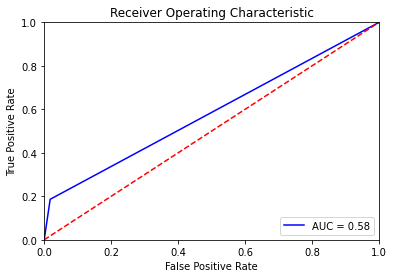

In [61]:
auc_roc_plot(y_test, y_pred)

In [62]:
# Feature Scaling - to check whether there is any improvement in the accuracy of the model
from sklearn.preprocessing import StandardScaler
x_new = x
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=2, test_size=0.20)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

y_pred=xgb.predict(x_test)
print('Accuracy on Extreme Gradient Boosting model is ',accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[19:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on Extreme Gradient Boosting model is  0.9289550406628817
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5036
           1       0.94      0.73      0.82      1481

    accuracy                           0.93      6517
   macro avg       0.93      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517



#### We can see that even after scaling is performed, there is no change/improvement in the XGB Classifier accuracy.

### Observation :- 

    Random Forest Classifier: Accuracy-> 92.63
    Gradient Boosting Classifier: Accuracy-> 91.76
    Decision Tree Classifier: Accuracy-> 88.44
    Extreme Gradient Boosting Classifier: Accuracy-> 92.89
    Logistic Regression: Accuracy-> 80.12

    From the above 5 models considered, we can say that 'Extreme Gradient Boosting Classifier' has given the highest accuracy which is 92.89. 

### Feature Importance

In [64]:
pd.Series(xgb.feature_importances_,index=x.columns).sort_values(ascending=False)*100

loan_grade                    30.822710
person_home_ownership         26.279566
loan_percent_income           18.911850
loan_intent                    8.161311
person_income                  5.396043
person_emp_length              3.382985
loan_int_rate                  2.138664
loan_amnt                      1.679100
cb_person_cred_hist_length     1.670853
cb_person_default_on_file      1.556923
dtype: float32

#### Observation

    The top 3 important features includes:

    1. loan_grade
    2. person_home_ownership
    3. loan_percent_income

### 5. Model Fine Tuning

In [65]:
# GridSearchCV hyperparameter tuning

from sklearn.model_selection import GridSearchCV
params = {
    "colsample_bytree": [0.9, 0.91],
    "gamma": [0.45],
    "learning_rate": [0.26], # default 0.1 
    "max_depth": [5], # default 3
    "n_estimators": [150, 157, 160], # default 100
    "subsample": [0.98, 0.97, 0.96]
}

Grid_CV = GridSearchCV(xgb, param_grid=params, cv=3, verbose=1, n_jobs=16, return_train_score=True)
Grid_CV.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[19:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=10...
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                    

In [66]:
# function to return the top selected models

def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report_best_scores(Grid_CV.cv_results_, 3)

Model with rank: 1
Mean validation score: 0.934 (std: 0.002)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.45, 'learning_rate': 0.26, 'max_depth': 5, 'n_estimators': 157, 'subsample': 0.96}

Model with rank: 1
Mean validation score: 0.934 (std: 0.002)
Parameters: {'colsample_bytree': 0.91, 'gamma': 0.45, 'learning_rate': 0.26, 'max_depth': 5, 'n_estimators': 157, 'subsample': 0.96}

Model with rank: 3
Mean validation score: 0.934 (std: 0.003)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.45, 'learning_rate': 0.26, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.96}

Model with rank: 3
Mean validation score: 0.934 (std: 0.002)
Parameters: {'colsample_bytree': 0.9, 'gamma': 0.45, 'learning_rate': 0.26, 'max_depth': 5, 'n_estimators': 160, 'subsample': 0.96}

Model with rank: 3
Mean validation score: 0.934 (std: 0.003)
Parameters: {'colsample_bytree': 0.91, 'gamma': 0.45, 'learning_rate': 0.26, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.96}

Model with rank: 3
Mean vali

In [67]:
from sklearn.metrics import roc_auc_score

Grid_best_xgb = Grid_CV.best_estimator_
Grid_best_xgb.fit(x_train, np.ravel(y_train)) 
preds_proba_Grid = Grid_best_xgb.predict_proba(x_test)
probs_Grid = preds_proba_Grid[:, 1]
Grid_bestauc = roc_auc_score(y_test, probs_Grid)

print ('xgb best model using GridSearchCV AUCROC score: {}'.format(Grid_bestauc))

[19:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb best model using GridSearchCV AUCROC score: 0.9502008228130854


### Observation:-
After hypertuning using 'GridSearchCV', we can see that the model has further improved and accuracy is increased to 95%.

### Conclusion:

    Best model: Extreme Gradient Boosting Classifier: 95%.

    The higher the value of the ROC AUC metric, the better.

    If a random model would show 0.5, a perfect model would achieve 1.0.

    The scoring system stands as follows:
        .9 -  1 = excellent  (A)
        .8 - .9 = good       (B)
        .7 - .8 = reasonable (C)

    Extreme Gradient Boosting Classifier Model is very accurate for ML predictions.